In [1]:
#1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#2
import os
Root = "/content/drive/MyDrive/Data/genres_original/"
os.chdir(Root)

In [3]:
#3
import numpy as np
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#4
audio_dataset_path="/content/drive/MyDrive/Data/genres_original"
metadata = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
#5
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type= 'kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features


In [6]:
#7
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
  try:
    final_class_labels=row["label"]
    file_name = os.path.join(os.path.abspath(audio_dataset_path), final_class_labels+'/',str(row["filename"]))
    data=features_extractor(file_name)
    extracted_features.append([data, final_class_labels])
  except Exception as e:
    print(f"Error: {e}")
    continue

554it [04:59,  2.04it/s]<ipython-input-5-4e6d45a322c4>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_name, res_type= 'kaiser_fast')
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
555it [05:00,  1.59it/s]

Error: 


1000it [08:36,  1.94it/s]


In [7]:
#8
extracted_features_df=pd.DataFrame(extracted_features, columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.947019, 35.86715, 2....",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [8]:
#9
extracted_features_df['class'].value_counts()

,count
class,
blues,100
classical,100
country,100
disco,100
hiphop,100
metal,100
pop,100
reggae,100
rock,100


In [9]:
#10
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [10]:
#11
X.shape

(999, 40)

In [11]:
#12
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [12]:
#13
y.shape

(999, 10)

In [13]:
#14
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
#15
X_train

array([[ 2.6653410e+01,  7.9789711e+01, -5.2055866e+01, ...,
        -1.4430333e+00, -1.2734197e+00, -5.9081397e+00],
       [-1.4495711e+02,  1.1846496e+02,  2.0525068e+01, ...,
         1.8998557e+00, -1.8821739e+00, -1.8517891e+00],
       [-6.6108925e+01,  9.7883812e+01, -1.8831675e+01, ...,
        -1.2424636e+00, -6.3691199e-01, -1.3383397e+00],
       ...,
       [-7.7426697e+01,  1.3087869e+02, -2.3275221e+01, ...,
        -4.2062173e+00, -3.5183537e+00,  2.6050329e+00],
       [-1.9040649e+02,  1.2951292e+02, -7.8296256e+00, ...,
        -2.2419319e+00, -3.9879441e+00, -1.9877437e+00],
       [-4.6609550e+01,  8.6802010e+01, -3.4776669e+01, ...,
         1.4675997e-01,  9.2151546e-01, -8.7239462e-01]], dtype=float32)

In [15]:
#16
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(799, 40)
(200, 40)
(799, 10)
(200, 10)


In [16]:
#17
import tensorflow as tf
print(tf.__version__)
# !pip uninstall tensorflow
# !pip install tensorflow
!pip install tensorflow

2.18.0


In [17]:
#17
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from sklearn import metrics

In [18]:
#18
num_labels = y.shape[1]

In [19]:
#19
y.shape[1]

10

In [20]:
#20
model=Sequential()
model.add(Dense(1024, input_shape=(40,), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(num_labels, activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
#21
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          41,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 741,674 (2.83 MB)

 Trainable params: 741,674 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#22
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [23]:
#23
import time
t=time.localtime()
current_time=time.strftime("%H:%M:%S",t)

In [34]:
#24
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=f'saved_models/audio_classification_{current_time}.keras',verbose=1,save_best_only=True)
start=datetime.now()
history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7791 - loss: 0.6612
Epoch 1: val_loss improved from inf to 1.37577, saving model to saved_models/audio_classification_13:41:01.keras
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7820 - loss: 0.6577 - val_accuracy: 0.6600 - val_loss: 1.3758
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7809 - loss: 0.6942
Epoch 2: val_loss did not improve from 1.37577
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7812 - loss: 0.6933 - val_accuracy: 0.6300 - val_loss: 1.4716
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7935 - loss: 0.6037
Epoch 3: val_loss did not improve from 1.37577
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7937 - loss: 0.6050 - val_accuracy: 0.6550 - val_loss: 1.4797
Epoch 4/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7615 - loss: 0.6718
Epoch 4: val_loss did not improve from 1.37577
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.

In [35]:
#25
model.evaluate(X_test, y_test, verbose=0)

[2.514547348022461, 0.6650000214576721]

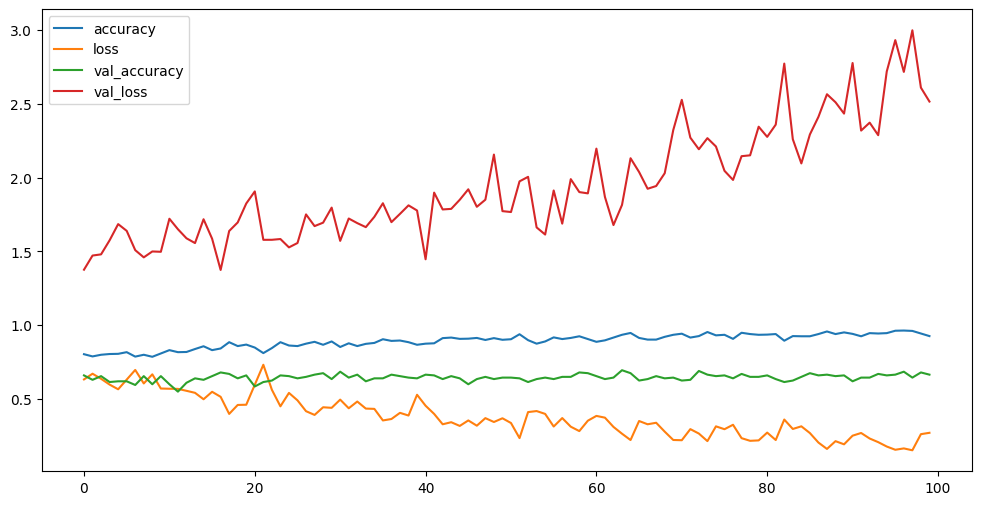

In [36]:
#26
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.show()

In [37]:
#27
model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.99999940e-01, 0.00000000e+00, 0.00000000e+00],
       [6.75971096e-04, 4.04803933e-11, 1.75917430e-05, ...,
        4.35477626e-10, 2.06621181e-07, 9.96735275e-01],
       [1.45928068e-02, 2.79159081e-04, 9.45235323e-03, ...,
        5.91219345e-04, 1.54112011e-01, 1.48620121e-02],
       ...,
       [3.01928297e-02, 9.16263182e-03, 1.38721205e-02, ...,
        3.32275522e-05, 8.36827755e-02, 1.26359257e-04],
       [1.30595129e-06, 5.49858839e-07, 3.80908568e-06, ...,
        3.06322254e-05, 5.10172322e-05, 2.59710173e-03],
       [2.92070708e-05, 3.64214259e-08, 6.17755177e-06, ...,
        9.60808848e-07, 4.80251759e-03, 1.14125331e-04]], dtype=float32)

In [38]:
#28
predictions = np.argmax(model.predict(X_test), axis=-1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [39]:
#29
filename="/content/drive/MyDrive/Data/genres_original/classical/classical.00001.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

[-324.09125     133.56267     -25.030157     24.55361     -11.939921
   17.6585       -5.5186734     1.71689     -10.575926     -0.8605745
   -7.80522       3.5297625     5.0546646     1.3707235     3.0050097
   -3.125152     -4.2895784     0.5940247     2.877037      0.37455836
   -1.2144454     0.7690292     2.2079856     1.0528631     5.3391447
    2.526477      3.4166243    -1.2346427     6.6579523    11.365144
   -0.9949531   -11.721296     -6.2246456     4.2277317     7.017334
    5.0720468     2.5235822    -5.4079676    -6.1680717     0.76458573]
[[-324.09125     133.56267     -25.030157     24.55361     -11.939921
    17.6585       -5.5186734     1.71689     -10.575926     -0.8605745
    -7.80522       3.5297625     5.0546646     1.3707235     3.0050097
    -3.125152     -4.2895784     0.5940247     2.877037      0.37455836
    -1.2144454     0.7690292     2.2079856     1.0528631     5.3391447
     2.526477      3.4166243    -1.2346427     6.6579523    11.365144
    -0.9949531 

In [40]:
#30
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[1]


array(['classical'], dtype='<U9')

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)
ac=accuracy_score(y_true,y_pred_classes)
print(ac)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[11  0  0  0  0  1  0  0  1  1]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 2  2 12  3  0  3  0  1  0  3]
 [ 0  0  2  9  2  1  0  2  2  6]
 [ 0  0  0  5 17  1  1  0  2  1]
 [ 0  2  0  0  0 13  0  0  1  0]
 [ 0  0  0  1  1  0 16  0  0  0]
 [ 0  2  0  2  0  0  0 15  3  1]
 [ 1  0  0  2  5  0  0  0 13  0]
 [ 1  0  0  1  0  0  1  0  1 16]]
0.665
